# Predicting Vehicle CO₂ Emissions with Data Science  
### CMSC 320 – Fall 2025  

**Authors:** Maxwell Voeltner, Kaleb Ward, Adegbemisola Onitiri, Nathan Xu

### Contributions  

- **Maxwell Voeltner:**  
  - Project idea  
  - Dataset Curation and Preprocessing  
  - Data Exploration and Summary Statistics  
  - ML Algorithm Design/Development  
  - ML Algorithm Training and Test Data Analysis  
  - Visualization, Result Analysis, Conclusion  
  - Final Tutorial Report Creation

Maxwell implemented the engine size vs. CO₂ linear regression hypothesis test and carried out some of the broader data exploration. He also handled much of the ML data preprocessing and wrote the visualization and results sections of the report.

- **Kaleb Ward:**  
  - Project idea  
  - Dataset Curation and Preprocessing  
  - Data Exploration and Summary Statistics  
  - ML Algorithm Design/Development  
  - ML Algorithm Training and Test Data Analysis  
  - Visualization, Result Analysis, Conclusion  
  - Final Tutorial Report Creation

Kaleb focused on the hypothesis testing components of the project and on building and interpreting the tree-based regression model. He created the associated visualizations, compared model behavior across different settings, and helped explain what the model results mean for understanding how vehicle features relate to CO₂ emissions.

- **Adegbemisola Onitiri:**  
  - Project idea
  - Data Exploration and Summary Statistics
  - Final Tutorial Report Creation

Adegbemisola contributed to the data exploration and summary statistics, helping to identify important trends and relationships in the cleaned dataset, and also helped write and polish portions of the final tutorial report.

- **Nathan Xu:**  
  - Project idea
  - Data Exploration and Summary Statistics
  - Final Tutorial Report Creation

Nathan collaborated on shaping the project idea and contributed to the exploratory data analysis and summary statistics, and also helped write and edit parts of the final tutorial report to ensure clarity and coherence.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, chi2_contingency, f_oneway, zscore
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.inspection import PartialDependenceDisplay

# **Introduction**

Cars are everywhere, and they play a major role in both daily life and global emissions. When people shop for vehicles, they often see fuel economy and emissions information in advertisements, but it is not always obvious how different features of a car affect its actual CO₂ output. At the same time, governments and consumers are becoming more conscious about climate change and air quality, and they need clear information about which vehicle characteristics matter most when looking at both fuel efficiency and CO₂ output.

In this project, we analyze a publicly available dataset of vehicles that includes engine size, cylinders, fuel type, transmission, fuel consumption, and CO₂ emissions. Our goal is to understand how these attributes relate to emissions and whether we can use them to predict a car’s CO₂ output.

More specifically, we focus on the following questions:

1. What does the distribution of fuel efficiency and CO₂ emissions look like across vehicles in the dataset?  
2. How are features such as engine size, cylinders, vehicle class, transmission, and fuel type related to fuel efficiency, CO₂ emissions and smog ratings?  
3. Can we build a machine learning model that accurately predicts a vehicle’s CO₂ emissions from its observable characteristics?  

Answering these questions is important for consumers who want lower-emission cars, for manufacturers interested in designing cleaner vehicles, and for policymakers who set standards and incentives.


Important note: this dataset does not include fully-electric vehicles

## **Data Curation**

In this section, we describe the dataset we use, cite its source, and show how we load it into a pandas DataFrame so that it is ready for analysis and modeling.

### Dataset Source

We use a public vehicle fuel consumption and emissions dataset that reports detailed information about thousands of cars. The original data come from Natural Resources Canada and are distributed on Kaggle as a CSV file with one row per vehicle configuration.

Dataset: https://www.kaggle.com/datasets/sajivankunarethinam/co2-emission-by-vehicle-dataset/data

### Loading the Dataset into pandas

We store the CSV file locally in this repository as cars.csv and load it into a pandas DataFrame named df. The cells below call pd.read_csv("cars.csv"), followed by df.info() and, to verify that the data were loaded correctly.


In [2]:
# loading in the dataset
df = pd.read_csv("cars.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13058 entries, 0 to 13057
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            12758 non-null  float64
 1   Make                  12758 non-null  object 
 2   Model                 12758 non-null  object 
 3   Vehicle class         12758 non-null  object 
 4   Engine size (L)       12758 non-null  float64
 5   Cylinders             12758 non-null  float64
 6   Transmission          12758 non-null  object 
 7   Fuel type             12758 non-null  object 
 8   City (L/100 km)       12758 non-null  float64
 9   Highway (L/100 km)    12758 non-null  float64
 10  Combined (L/100 km)   12758 non-null  float64
 11  Combined (mpg)        12758 non-null  float64
 12  CO2 emissions (g/km)  12758 non-null  float64
 13  CO2 rating            11313 non-null  float64
 14  Smog rating           9925 non-null   float64
dtypes: float64(10), obj

### Dataset Information

From the df.info() output above, we see that the dataset contains:

- **13058 rows** (vehicle models)
- **15 columns**

The columns include:

- Model year, Make, and Model
- Vehicle class
- Engine size (L) and Cylinders
- Transmission and Fuel type
- Fuel consumption in city, highway, and combined (City (L/100 km), Highway (L/100 km), Combined (L/100 km), Combined (mpg))
- CO2 emissions (g/km)
- CO2 rating and Smog rating

These variables give us information to study how physical and categorical characteristics of a car relate to fuel efficiency, emissions, and smog rating.


# **Data Preprocessing**

To make the dataset ready for analysis, we perform several cleaning and preprocessing steps. In the cells that follow, we:

1. Inspect a few example rows with df.head().
2. Remove rows with missing values so that every record has complete information.
3. Convert numeric columns that conceptually represent integers to integer type.
4. Make categorical columns more readable.
5. Remove duplicate rows and clearly unrealistic vehicle specifications.

After these steps, we obtain a clean pandas DataFrame that we use for exploratory analysis and machine learning.


In [4]:
df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2015.0,Acura,ILX,Compact,2.0,4.0,AS5,Z,9.7,6.7,8.3,34.0,191.0,NaN,NaN
1,2015.0,Acura,ILX,Compact,2.4,4.0,M6,Z,10.8,7.4,9.3,30.0,214.0,NaN,NaN
2,2015.0,Acura,ILX Hybrid,Compact,1.5,4.0,AV7,Z,6.0,6.1,6.1,46.0,140.0,NaN,NaN
3,2015.0,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6.0,AS6,Z,12.7,9.1,11.1,25.0,255.0,NaN,NaN
4,2015.0,Acura,RDX AWD,Sport utility vehicle: Small,3.5,6.0,AS6,Z,12.1,8.7,10.6,27.0,244.0,NaN,NaN



Some rows in the raw dataset contain missing values, including missing smog ratings. Because we want to compare vehicle features with both emissions and smog rating, we restrict our analysis to complete cases and drop any rows that contain null values. This leaves us with only fully observed vehicle records.


In [5]:
# filtering out cars with any missing values (b/c all fields are necessary for our analysis)
df.dropna(inplace=True)
print("Number of Entries after dropping rows w/ nulls:", len(df))

Number of Entries after dropping rows w/ nulls: 9925


Smog rating is essential for our analysis. We can see from the info() cell above that smog rating was our lowest non-null category with 9925 non-nulls. After dropping any rows with null values in any category, we get 9925 entries. That means that all cars with a smog rating also had a non-null value for every single other category. This means no valuable data entries were lost.

Columns such as model year, number of cylinders, CO₂ emissions, and smog rating are integers. In the raw CSV they appear as floats, so we convert them to integer type to make the DataFrame easier to interpret and to avoid unnecessary decimal values.


In [6]:
# converting appropriate fields to integer fields
integer_fields = ["Model year", "Cylinders", "CO2 emissions (g/km)", "Smog rating"]
for field in integer_fields:
    df[field] = df[field].astype(int)

Here a personal choice was made for clarity of data. The fuel type labels in the original dataset are not commonly-known (especially for people who don't visit gas stations often). The labels are mapped to their full brand names.

In [7]:
# converting the oddly-labeled fuel type abbreviations to their brand name for clarity
fuel_type_mapping = {
    "D": "Diesel",
    "Z": "Premium",
    "E": "Flex-Fuel",
    "X": "Regular"
}

df["Fuel type"] = df["Fuel type"].map(fuel_type_mapping)

Some vehicle configurations appear more than once in the raw file. To avoid counting the same configuration multiple times, we drop exact duplicate rows and keep only unique configurations so our aggregate and distribution analysis isn't distorted.


In [8]:
# Number of Duplicated Rows
print("Number of Duplicated Rows: ", df.duplicated().sum())
df = df.drop_duplicates()

Number of Duplicated Rows:  1317


A few records have extreme values that are unlikely to correspond to real production vehicles (for example, unrealistically large engines or extremely high mpg). We remove rows with model years after 2025, engine sizes above a reasonable upper bound, very high cylinder counts, and implausibly high combined mpg. This focuses our analysis on realistic vehicles and reduces the impact of data entry errors.


In [9]:
# max model year cant be more than 2025 (current year)
df = df[df["Model year"] <= 2025]

# max engine size can't be more than 28.4L
df = df[df["Engine size (L)"] <= 28.4]

# max cylinders can't be more than 16
df = df[df["Cylinders"] <= 16]

# the best performing car is only getting 57mpg right now
df = df[df["Combined (mpg)"] <= 57]

print("Number of Entries after dropping duplicates and nonsensical data:", len(df))

Number of Entries after dropping duplicates and nonsensical data: 7761


We ended up losing 5324 entries to get down to 7761. That's definitely a lot. However, we saw that each one of those entries was either not usable due to having a missing smog rating or has verifiably data somewhere in the record. We still have an appropriate amount of data entries to perform a meaningful statistical analysis. This curated feature set will be used in later sections to train and evaluate regression models for predicting CO₂ emissions.

# **Data Exploration**

In [10]:
df.describe()

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
count,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000
mean,2020.308079,3.155676,5.645535,12.529803,9.249968,11.053344,27.114805,256.654039,4.495039,4.798093
std,2.259698,1.339913,1.901433,3.327348,2.147856,2.749851,6.758468,59.991636,1.506432,1.779342
min,2017.000000,0.900000,3.000000,4.800000,4.500000,5.000000,11.000000,114.000000,1.000000,1.000000
25%,2018.000000,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.000000,3.000000,3.000000
50%,2020.000000,3.000000,6.000000,12.200000,9.000000,10.700000,26.000000,253.000000,4.000000,5.000000
75%,2022.000000,3.700000,6.000000,14.500000,10.500000,12.700000,31.000000,295.000000,5.000000,6.000000
max,2024.000000,8.400000,16.000000,30.700000,20.900000,26.100000,56.000000,608.000000,10.000000,8.000000


In [11]:
# Number of Rows and Columns after cleaning
row, col = df.shape
print("Number of Entries:", row)
print("Number of Features:", col)

Number of Entries: 7761
Number of Features: 15


Exploring the distribution of our numerical attributes:

In [12]:
# NUMBER OF UNIQUE VALUES PER COLUMN
print("NUMBER OF UNIQUE VALUES PER COLUMN")
print(df.nunique())

NUMBER OF UNIQUE VALUES PER COLUMN
Model year                 8
Make                      41
Model                   1745
Vehicle class             15
Engine size (L)           47
Cylinders                  8
Transmission              26
Fuel type                  4
City (L/100 km)          197
Highway (L/100 km)       129
Combined (L/100 km)      163
Combined (mpg)            45
CO2 emissions (g/km)     311
CO2 rating                10
Smog rating                7
dtype: int64


In [13]:
# Proportion of values in Vehicle Class
df['Vehicle class'].value_counts(normalize=True) * 100

Vehicle class
Sport utility vehicle: Small       19.417601
Sport utility vehicle: Standard    13.232831
Mid-size                           12.859168
Pickup truck: Standard              9.895632
Compact                             9.792553
Subcompact                          8.787527
Full-size                           7.524804
Two-seater                          6.274965
Minicompact                         4.496843
Station wagon: Small                2.525448
Pickup truck: Small                 2.216209
Special purpose vehicle             0.992140
Minivan                             0.876176
Station wagon: Mid-size             0.863291
Van: Passenger                      0.244814
Name: proportion, dtype: float64

array([[<Axes: title={'center': 'Model year'}>,
        <Axes: title={'center': 'Engine size (L)'}>,
        <Axes: title={'center': 'Cylinders'}>],
       [<Axes: title={'center': 'City (L/100 km)'}>,
        <Axes: title={'center': 'Highway (L/100 km)'}>,
        <Axes: title={'center': 'Combined (L/100 km)'}>],
       [<Axes: title={'center': 'Combined (mpg)'}>,
        <Axes: title={'center': 'CO2 emissions (g/km)'}>,
        <Axes: title={'center': 'CO2 rating'}>],
       [<Axes: title={'center': 'Smog rating'}>, <Axes: >, <Axes: >]],
      dtype=object)

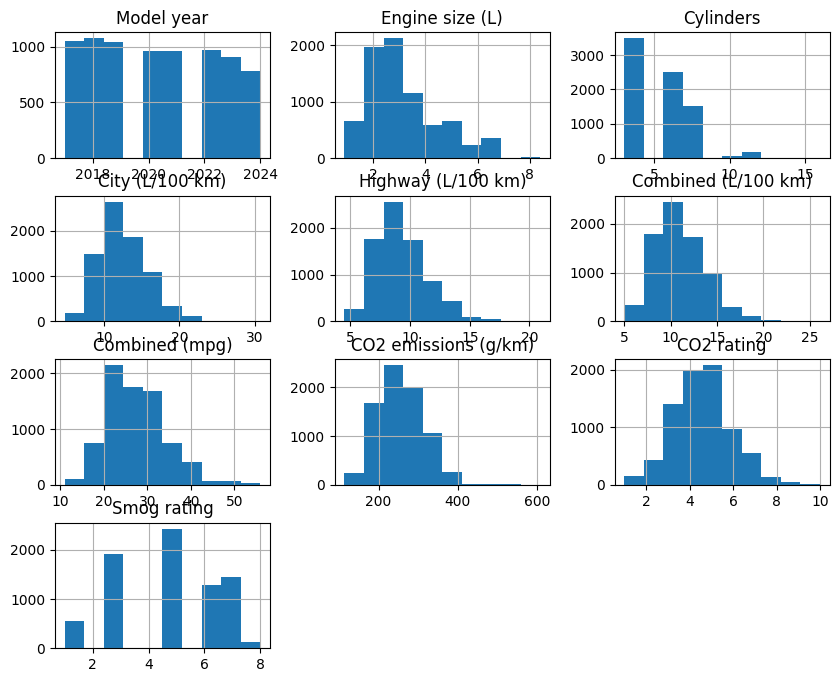

In [14]:
# Histogram for all numeric columns
df.hist(figsize=(10,8))

These histograms visually reveal that CO2 emissions (g/km), CO2 rating, and miles per gallon (combined) have a seemingly normal distribution.

In [15]:
print("Miles Per Gallon:")
print("   Mean ==>", df["Combined (mpg)"].mean())
print("   STD ==>", df["Combined (mpg)"].std())
# -------------------------------------------- #
print("CO2 Emissions:")
print("   Mean ==>", df["CO2 emissions (g/km)"].mean())
print("   STD ==>", df["CO2 emissions (g/km)"].std())
# -------------------------------------------- #
print("CO2 Rating:")
print("   Mean ==>", df["CO2 rating"].mean())
print("   STD ==>", df["CO2 rating"].std())

Miles Per Gallon:
   Mean ==> 27.114804793196754
   STD ==> 6.75846842713458
CO2 Emissions:
   Mean ==> 256.6540394279088
   STD ==> 59.991636117930454
CO2 Rating:
   Mean ==> 4.4950392990594
   STD ==> 1.5064320434978256


An average of 27mpg with a standard deviation of 6.75mpg reveals our miles per gallon datapoints are spread out. 27 is a reasonable average and the large standard deviation reflects the wide range of vehicle types in our dataset (seen a couple cells above). We have many sport utility vehicles which are known for being fuel efficient and many heavy vehicles which are fuel inefficient.

The standard deviation for CO2 emissions rating is high as well, reinforcing our variance in vehicle classes. The CO2 rating is a score given by the EPA, and we don't have their score formula. But for a 1-10 scale, a mean of 4.49 indicates the center of our data is scoring subpar for C02 emissions.

In [16]:
# finding number of outliers for miles per gallon (combined)
mpg_zscore_df = df.copy()
mpg_zscore_df["mpg_zscore"] = zscore(mpg_zscore_df["Combined (mpg)"])
mpg_zscore_df = mpg_zscore_df[abs(mpg_zscore_df["mpg_zscore"]) >= 3]
print("Number of MPG outliers:", len(mpg_zscore_df))

Number of MPG outliers: 80


In [17]:
# Count of values in Model
df['Model'].value_counts().head(25)

Model
Sierra 4WD             38
Silverado 4WD          38
Mustang                36
Silverado              30
Sierra                 30
Camaro                 30
F-150 FFV              28
Civic Sedan            26
Civic Hatchback        26
Mustang Convertible    25
Elantra                24
F-150 4X4              23
Edge AWD               23
Canyon                 23
Colorado               23
F-150                  22
Corolla                21
Challenger             21
Tacoma 4WD             20
Canyon 4WD             20
Sierra FFV             20
Silverado FFV          20
Sierra 4WD FFV         20
Explorer AWD           20
Colorado 4WD           20
Name: count, dtype: int64

In [18]:
# Proportion of values in Fuel Type
df['Fuel type'].value_counts(normalize=True) * 100

Fuel type
Premium      48.666409
Regular      46.282696
Flex-Fuel     2.667182
Diesel        2.383713
Name: proportion, dtype: float64

In [19]:
# Proportion of values in Smog Category
df['Smog rating'].value_counts(normalize=True) * 100

Smog rating
5    31.297513
3    24.674655
7    18.670274
6    16.466950
1     7.254220
8     1.546193
2     0.090195
Name: proportion, dtype: float64

In [20]:
# Average Smog rating per Fuel Type
df.groupby('Fuel type')['Smog rating'].mean()

Fuel type
Diesel       2.681081
Flex-Fuel    4.183575
Premium      4.339158
Regular      5.425111
Name: Smog rating, dtype: float64

Our analysis shows that the dataset contains a wide range of modern vehicles, reflected in substantial variation in fuel efficiency, physical characteristics, and environmental impact. The average combined miles per gallon is 27, with a standard deviation of 6.75, showing that the vehicles range from small, efficient cars to larger, less efficient ones. CO₂ emission ratings also vary widely, with an average score of 4.49 on the 1-10 scale, suggesting that most cars score below the midpoint for environmental performance. These patterns are reinforced by the distribution of fuel types and smog categories, since some fuels consistently produce higher smog ratings.

The histograms reveal that combined MPG, CO₂ emissions, and CO₂ rating are roughly normal in distribution, but their large spreads reflect meaningful variation across vehicle types, from efficient hybrids to heavy SUVs. We also see that some features, such as vehicle class and model, have many unique categories, while others are dominated by just a few values, which affects how we group or encode them in analysis. Outliers in MPG align with expectations for unusually efficient or highly inefficient vehicles. Across these observations, we find that physical traits like engine size and fuel type are closely linked to environmental metrics such as CO₂ emissions and smog rating.

These findings highlight why it is important to study how vehicle attributes shape environmental outcomes and show the value of using methods like regression modeling, correlation analysis, and group comparisons to better understand and predict CO₂ emissions.

# **Hypothesis Testing**

**Engine Size related to CO₂ Emissions?**

Largers engines generally burn more fuel than smaller engines. However, vehicles using larger engines are on the highway more often than not so their fuel efficiency might be better (relative to the engine size) than smaller engine vehicles that spend a lot of time starting and stopping in local streets. It makes sense to test this relationship.

**Regression**<br>
H0: Engine Size and CO₂ Emissions are not related<br>
HA: Engine Size and CO₂ Emissions are related

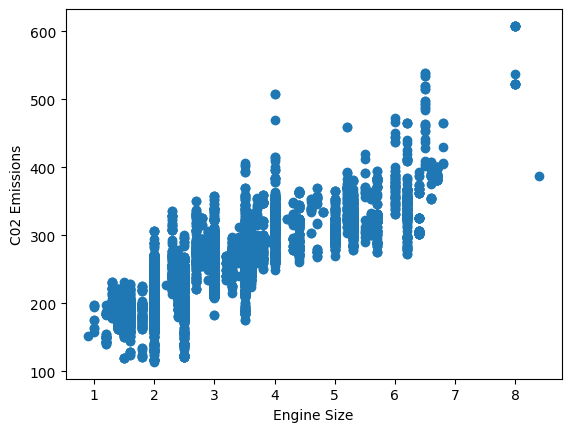

In [21]:
# visualizing hypothesis
plt.scatter(df["Engine size (L)"], df["CO2 emissions (g/km)"])
plt.xlabel("Engine Size")
plt.ylabel("C02 Emissions")
plt.show()

In [22]:
# computing p-value from regression analysis
result = linregress(df["Engine size (L)"], df["CO2 emissions (g/km)"])
print("p-value:", result.pvalue)

p-value: 0.0


The regression analysis shows a clear and statistically significant link between engine size and CO₂ emissions. The model’s p-value is nearly zero, well below standard significance levels, so we can reject the idea that engine size and CO₂ emissions are unrelated. This result means that larger engines usually produce more CO₂, which matches what we expect from how fuel burns. Although factors like driving conditions and vehicle design also affect fuel efficiency, the data indicate that engine size is still the main and most reliable predictor of emissions. These results help us understand which vehicle features have the biggest effect on the environment and suggest that encouraging smaller engines and cleaner fuels can help reduce pollution.

Engine Size & CO₂

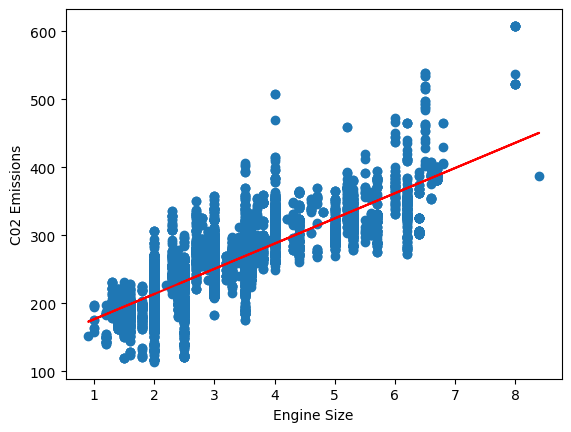

In [23]:
plt.scatter(df["Engine size (L)"], df["CO2 emissions (g/km)"])
plt.xlabel("Engine Size")
plt.ylabel("C02 Emissions")
plt.plot(df["Engine size (L)"], result.intercept + result.slope*df["Engine size (L)"], 'r', label='fitted line')
plt.show()

**Fuel Type related to CO₂ Emissions?**

Different fuel types generally produce varying levels of CO₂ when burned or used to power vehicles. Gasoline engines typically emit more CO₂ than diesel per unit of fuel, while electric vehicles may produce little to none. Since fuel composition and combustion efficiency differ across types, it makes sense to test whether fuel type significantly affects CO₂ emissions.

**One-Way ANOVA**<br>
H0: Fuel type does not affect CO2 emissions<br>
HA: Fuel type significantly affects CO2 emissions

In [24]:
# Get the list of fuel types and corresponding emissions
fuel_groups = [group['CO2 emissions (g/km)'].values
               for name, group in df.groupby('Fuel type')]

# Run ANOVA
f_stat, p_value = f_oneway(*fuel_groups)
print("ANOVA Test Results:")
print(f"F-statistic = {f_stat:.3f}")
print(f"P-value = {p_value:.5f}")

ANOVA Test Results:
F-statistic = 230.819
P-value = 0.00000


Since p < 0.05, we can reject the null hypothesis. This means that there is a statistically significant association between **Fuel Type** and **CO₂ emissions**

Fuel Type and CO₂

/var/folders/4j/bzjzr7sx5cv9skphgq447myw0000gn/T/ipykernel_35270/2492406405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Fuel type', y='CO2 emissions (g/km)', palette='Set3')


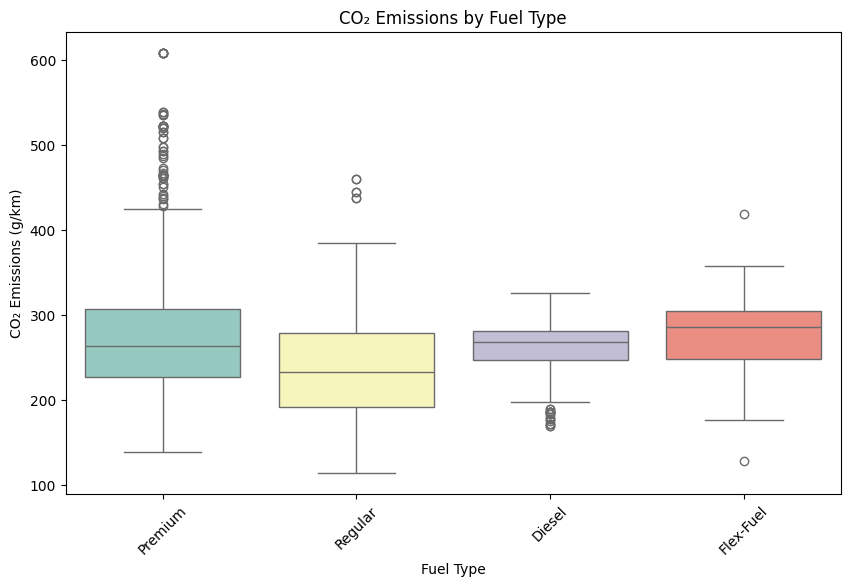

In [25]:
# Visualization
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Fuel type', y='CO2 emissions (g/km)', palette='Set3')
plt.title('CO₂ Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('CO₂ Emissions (g/km)')
plt.xticks(rotation=45)
plt.show()

**Follow-Up Tukey Test**

In [26]:
anova_df = df[["Fuel type", "CO2 emissions (g/km)"]]

tukey = pairwise_tukeyhsd(
    endog=anova_df["CO2 emissions (g/km)"],   # Dependent variable
    groups=anova_df["Fuel type"],             # Categorical variable
    alpha=0.05                                # Significance level
)

print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2  meandiff p-adj   lower    upper   reject
------------------------------------------------------------
   Diesel Flex-Fuel   20.979 0.0018   6.0324  35.9256   True
   Diesel   Premium  14.2602 0.0055    3.136  25.3844   True
   Diesel   Regular -20.1278    0.0 -31.2654  -8.9903   True
Flex-Fuel   Premium  -6.7188 0.3577 -17.2644   3.8268  False
Flex-Fuel   Regular -41.1068    0.0 -51.6666 -30.5471   True
  Premium   Regular  -34.388    0.0  -37.831 -30.9451   True
------------------------------------------------------------


Overall, the results strongly indicate that fuel type plays a significant role in determining CO₂ emissions. The one-way ANOVA confirmed that not all fuel types produce the same average emissions, and the Tukey post-hoc test clarified which groups differ from one another. Regular-fuel vehicles stood out as the highest emitters, consistently producing more CO₂ than Diesel, Flex-Fuel, and Premium vehicles. Flex-Fuel and Premium cars performed better, showing  lower emissions, while Diesel vehicles fell in the middle but still below Regular. The only pair without a statistically significant difference was Flex-Fuel versus Premium, suggesting similar emissions profiles for those categories. These findings highlight how fuel choice directly influences environmental impact and reinforce the value of transitioning consumers toward cleaner, lower-emission fuel options.

**Fuel Type related to Smog Rating Category?**

Smog ratings indicate how much a vehicle contributes to air pollution based on emissions of harmful gases. Different fuel types produce varying levels of pollutants, which can influence these ratings. Because fuel combustion and emission control technologies differ by fuel type, it makes sense to test whether there is an association between fuel type and smog rating category.

**Chi-Square Test of Independence**<br>
H0: There is no association between fuel type and smog rating category.<br>
HA: There is an association between fuel type and smog rating category.<br><br>

*Note -> Regarding smog ratings, vehicles that score a 10 are the **cleanest**. The categories are defined as such:<br>

*   Low: 1–3
*   Medium: 4–7
*   High: 8–10





In [27]:
# Creating smog rating categories
def categorize_smog(rating):
    if rating <= 3:
        return "Low"
    elif rating <= 7:
        return "Medium"
    else:
        return "High"

df["Smog Category"] = df["Smog rating"].apply(categorize_smog)

# Build the contingency table
contingency = pd.crosstab(df["Fuel type"], df["Smog Category"])

# Run the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency)
print("\nChi-square test results:")
print(f"Chi2 Statistic: {chi2:.3f}")
print(f"P-value: {p:.4f}")


Chi-square test results:
Chi2 Statistic: 809.302
P-value: 0.0000


Since p < 0.05, we can reject the null hypothesis. This means that there is a statistically significant association between **Fuel Type** and **Smog Rating Category**

Fuel Type and Smog Rating Category

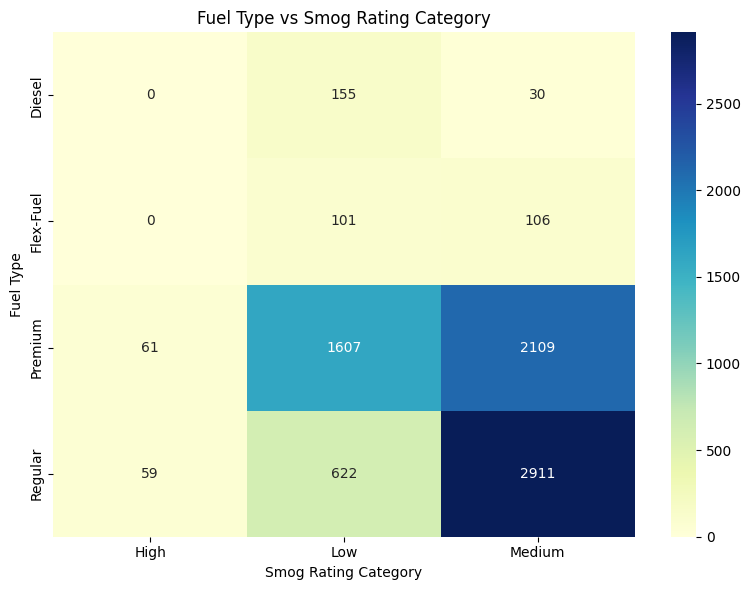

In [28]:
# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(contingency, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Fuel Type vs Smog Rating Category")
plt.xlabel("Smog Rating Category")
plt.ylabel("Fuel Type")
plt.tight_layout()
plt.show()

The heatmap shows that Regular and Premium fuel vehicles make up most of the dataset and are most commonly associated with Medium smog ratings, indicating higher overall pollution levels compared to other fuel types. Diesel and Flex-Fuel vehicles, on the other hand, show no entries in the High smog category and appear mostly in the Low or Medium categories, suggesting cleaner performance under smog standards. Only a small number of vehicles fall into the High smog category overall.

In [29]:
# dont need the smog category anymore
df.drop(columns=["Smog Category"], inplace=True)

# **Machine Learning Analysis**

In [30]:
# Dropping unneeded categories
machine_learning_df = df.copy()

### **Feature Engineering**

First we're converting the fuel type (nominal attribute) to a binary representation of the fuel type using one-hot encoding so our machine learning model can handle the fuel type feature. There's 4 fuel types, so we only expand our dataset by 3 columns since we'll end up dropping the original fuel type column.

In [31]:
fuel_encoded = pd.get_dummies(machine_learning_df["Fuel type"])
machine_learning_df = pd.concat([machine_learning_df, fuel_encoded], axis=1)
machine_learning_df.drop(columns=["Fuel type"], inplace=True)
machine_learning_df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating,Diesel,Flex-Fuel,Premium,Regular
2234,2017,Acura,ILX,Compact,2.4,4,AM8,9.4,6.8,8.2,34.0,192,7.0,6,False,False,True,False
2235,2017,Acura,MDX Hybrid AWD,Sport utility vehicle: Small,3.0,6,AM7,9.1,9.0,9.0,31.0,210,6.0,6,False,False,True,False
2236,2017,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS9,12.6,9.0,11.0,26.0,259,4.0,6,False,False,True,False
2237,2017,Acura,MDX SH-AWD Elite,Sport utility vehicle: Small,3.5,6,AS9,12.2,9.0,10.7,26.0,251,5.0,6,False,False,True,False
2238,2017,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,26.0,261,4.0,6,False,False,True,False


Now, as we discovered earlier, we have 15 unique classes of vehicles. We know that vehicle class heavily influences the size and weight of the vehicle which impact the number of number of cylinders and engine size. So here, we will use target (mean) encoding on the vehicle class category. Here we avoid expanding our dataset by 14 dimensions; the tradeoff being that information about the target (CO2) is now present in our dataset. But as mentioned, other attributes of the vehicles are dependent on vehicle class; so since it's arguably the most impactful feature, it's acceptable here to use target mean encoding.

In [32]:
# target mean encoding
vehicle_class_to_CO2_mean_map = {}

vehicle_classes = machine_learning_df.groupby("Vehicle class")
for vehicle_class, table in vehicle_classes:
    CO2_mean = table["CO2 emissions (g/km)"].mean()
    vehicle_class_to_CO2_mean_map[vehicle_class] = CO2_mean

machine_learning_df["Vehicle class"] = machine_learning_df["Vehicle class"].map(vehicle_class_to_CO2_mean_map)
machine_learning_df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating,Diesel,Flex-Fuel,Premium,Regular
2234,2017,Acura,ILX,216.181579,2.4,4,AM8,9.4,6.8,8.2,34.0,192,7.0,6,False,False,True,False
2235,2017,Acura,MDX Hybrid AWD,233.006636,3.0,6,AM7,9.1,9.0,9.0,31.0,210,6.0,6,False,False,True,False
2236,2017,Acura,MDX SH-AWD,233.006636,3.5,6,AS9,12.6,9.0,11.0,26.0,259,4.0,6,False,False,True,False
2237,2017,Acura,MDX SH-AWD Elite,233.006636,3.5,6,AS9,12.2,9.0,10.7,26.0,251,5.0,6,False,False,True,False
2238,2017,Acura,NSX,296.714579,3.5,6,AM9,11.1,10.8,11.0,26.0,261,4.0,6,False,False,True,False


In [33]:
print(machine_learning_df["Transmission"].unique())

['AM8' 'AM7' 'AS9' 'AM9' 'AS6' 'AM6' 'A8' 'M7' 'M6' 'AS8' 'A6' 'AS10' 'AV'
 'A9' 'M5' 'A5' 'A4' 'AV7' 'AS7' 'AV6' 'AV8' 'AS5' 'A7' 'A10' 'AV10' 'AV1']


Now we need to handle the transmission type.

For context:

*   A  ==> Automatic (car automatically shifts gears)
*   M  ==> Manual (driver shifts gears)
*   AM ==> Automated Manual (manual transmission but controlled by computer)
*   AS ==> Automatic Selectable (AM but can be overridden by driver)
*   AV ==> Continuously Variable Transmission (no gears - car uses pulleys to adjust to the best RPM)
*   1 - 10 ==> Number of gears (simulated gears for AV)


In reality, the transmission type is what matters here, not the gears. Gear number has minimal impact; and having a lower gear in one transmission type might be better for CO2 while having a higher gear in another might also be better for CO2. So we're gonna drop the gear number to avoid having to make the model way more complex than it needs to be.

We'll do some one hot encoding for the 5 transmission types

In [34]:
# dropping the gear number
def remove_gear_number(transmission):
    if (transmission.startswith("AM")):
        return "Automated Manual"
    elif (transmission.startswith("AS")):
        return "Automatic Selectable"
    elif (transmission.startswith("AV")):
        return "Continuously Variable"
    elif (transmission.startswith("A")):
        return "Automatic"
    else:
        return "Manual"

machine_learning_df["Transmission"] = machine_learning_df["Transmission"].apply(remove_gear_number)

# one hot encoding
transmission_encoded = pd.get_dummies(machine_learning_df["Transmission"])
machine_learning_df = pd.concat([machine_learning_df, transmission_encoded], axis=1)
machine_learning_df.drop(columns=["Transmission"], inplace=True)
machine_learning_df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),...,Smog rating,Diesel,Flex-Fuel,Premium,Regular,Automated Manual,Automatic,Automatic Selectable,Continuously Variable,Manual
2234,2017,Acura,ILX,216.181579,2.4,4,9.4,6.8,8.2,34.0,...,6,False,False,True,False,True,False,False,False,False
2235,2017,Acura,MDX Hybrid AWD,233.006636,3.0,6,9.1,9.0,9.0,31.0,...,6,False,False,True,False,True,False,False,False,False
2236,2017,Acura,MDX SH-AWD,233.006636,3.5,6,12.6,9.0,11.0,26.0,...,6,False,False,True,False,False,False,True,False,False
2237,2017,Acura,MDX SH-AWD Elite,233.006636,3.5,6,12.2,9.0,10.7,26.0,...,6,False,False,True,False,False,False,True,False,False
2238,2017,Acura,NSX,296.714579,3.5,6,11.1,10.8,11.0,26.0,...,6,False,False,True,False,True,False,False,False,False


The last major feature transformation we want to do here is encoding the make of the vehicle. If you take two cars, 1 from one manufacturer and one from another, and they both have the same specs (like transmission type). We saw earlier, theres 41 different makes, so one hot encoding would expand out dataset too much. It's not ideal, but we're going to use label encoding here.

In [35]:
label_encoder = LabelEncoder()
make_column = list(machine_learning_df["Make"].values)
machine_learning_df["Make"] = label_encoder.fit_transform(make_column)
machine_learning_df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),...,Smog rating,Diesel,Flex-Fuel,Premium,Regular,Automated Manual,Automatic,Automatic Selectable,Continuously Variable,Manual
2234,2017,0,ILX,216.181579,2.4,4,9.4,6.8,8.2,34.0,...,6,False,False,True,False,True,False,False,False,False
2235,2017,0,MDX Hybrid AWD,233.006636,3.0,6,9.1,9.0,9.0,31.0,...,6,False,False,True,False,True,False,False,False,False
2236,2017,0,MDX SH-AWD,233.006636,3.5,6,12.6,9.0,11.0,26.0,...,6,False,False,True,False,False,False,True,False,False
2237,2017,0,MDX SH-AWD Elite,233.006636,3.5,6,12.2,9.0,10.7,26.0,...,6,False,False,True,False,False,False,True,False,False
2238,2017,0,NSX,296.714579,3.5,6,11.1,10.8,11.0,26.0,...,6,False,False,True,False,True,False,False,False,False


Now its time for the Machine Learning to begin.

We're trying to figure out how the physical attributes of a car impacts its CO2 emissions. Miles per gallon and all 3 of those liters per 100 kilometers columns tell you how efficient the fuel system is which determines the CO2 emissions. So the car's features, as they relate to CO2 emissions, are already calculated in to those categories. So we're going to ignore those.

Justification for dropping categories:

*   Model year ==> not a physical attribute (impact embedded in physical attributes of car)
*   Model ==> not a physical attribute (impact embedded in physical attributes of car)
*   CO2 rating ==> classification of the output - not appropriate for input

In [36]:
# getting inputs (X) and labels (Y)
X = machine_learning_df[["Make", "Vehicle class", "Engine size (L)", "Cylinders", "Smog rating", "Diesel", "Flex-Fuel", "Premium", "Regular", "Automated Manual", "Automatic", "Automatic Selectable", "Continuously Variable", "Manual"]]
y = machine_learning_df["CO2 emissions (g/km)"]

In [37]:
# splitting training set: 80% train and 20% test
random_state = 42
np.random.seed(random_state)
test_size = 0.2

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state)

### **Analysis with a Tree-Based Regression Model**

We chose a regression model rather than classification or clustering because our target, CO₂ emissions, is a continuous value we want to predict. Among regression approaches, tree-based ensemble models (especially Random Forest) are most appropriate for this dataset because they handle nonlinear relationships and mixed feature types well, often outperforming linear models for real-world emission data.

**Why regression?** CO₂ is a continuous quantity, and regression models (linear & tree-based) directly predict the numeric values.

**Why Random Forest?** Tree ensembles capture nonlinearity and interactions (e.g., engine size × vehicle weight), and often outperform linear models on tabular datasets.

**Why not Neural Networks?** Overkill for structured tabular data. Also requires tuning & more data



**Random Forest Regression Training & Evaluation**

In [38]:
rf_model = RandomForestRegressor(
    n_estimators=300,       # Number of trees
    max_depth=None,         # Let trees expand fully
    min_samples_split=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, Y_train)

# Predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Evaluation
rf_train_mse = mean_squared_error(Y_train, rf_train_pred)
rf_test_mse = mean_squared_error(Y_test, rf_test_pred)

rf_train_r2 = r2_score(Y_train, rf_train_pred)
rf_test_r2 = r2_score(Y_test, rf_test_pred)

print(f"Train R²:  {rf_train_r2:.3f}")
print(f"Test R²:   {rf_test_r2:.3f}")
print(f"Train MSE: {rf_train_mse:.2f}")
print(f"Test MSE:  {rf_test_mse:.2f}")

Train R²:  0.961
Test R²:   0.940
Train MSE: 142.92
Test MSE:  202.79


### **Visualizing Feature Importance**

[7.28003687e-01 6.72972610e-02 5.88320207e-02 4.09832381e-02
 3.88086796e-02 3.24501219e-02 8.98743624e-03 6.96303458e-03
 4.78680407e-03 4.40177744e-03 3.26383998e-03 3.00487605e-03
 1.87813501e-03 3.39087867e-04]


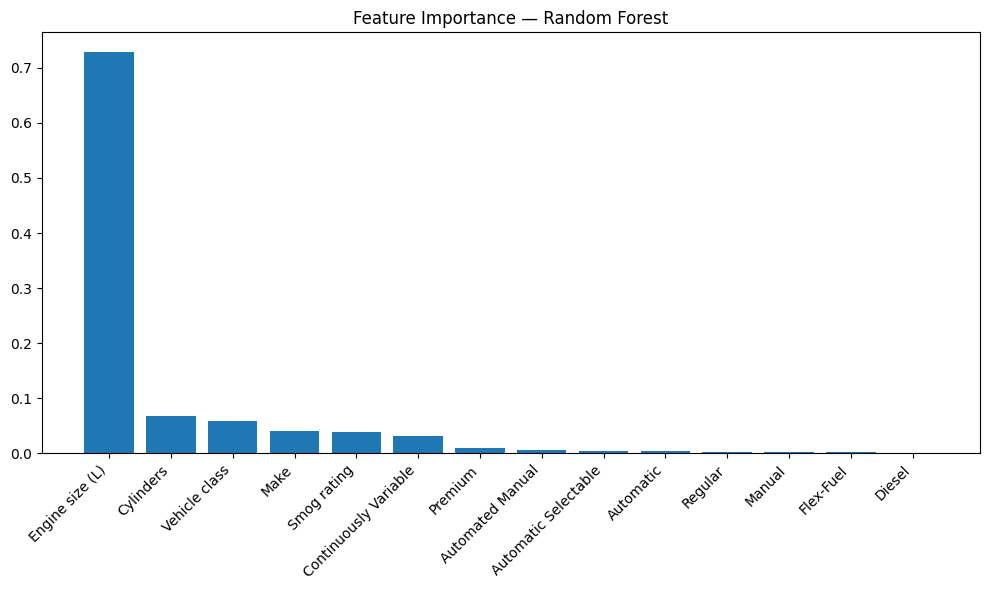

In [39]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

print(importances[indices])
plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=45, ha="right")
plt.title("Feature Importance — Random Forest")
plt.tight_layout()
plt.show()

Furthermore, we can see how each feature affects CO₂ emissions beyond feature importance percentages. Using a **partial dependence plot (PDP)**, we can see how changing a feature changes predicted CO₂ (holding everything else constant).

/Users/max/Code/CMSC320-Final-Project/.venv/lib/python3.13/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 3 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(
/Users/max/Code/CMSC320-Final-Project/.venv/lib/python3.13/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 0 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(
/Users/max/Code/CMSC320-Final-Pr

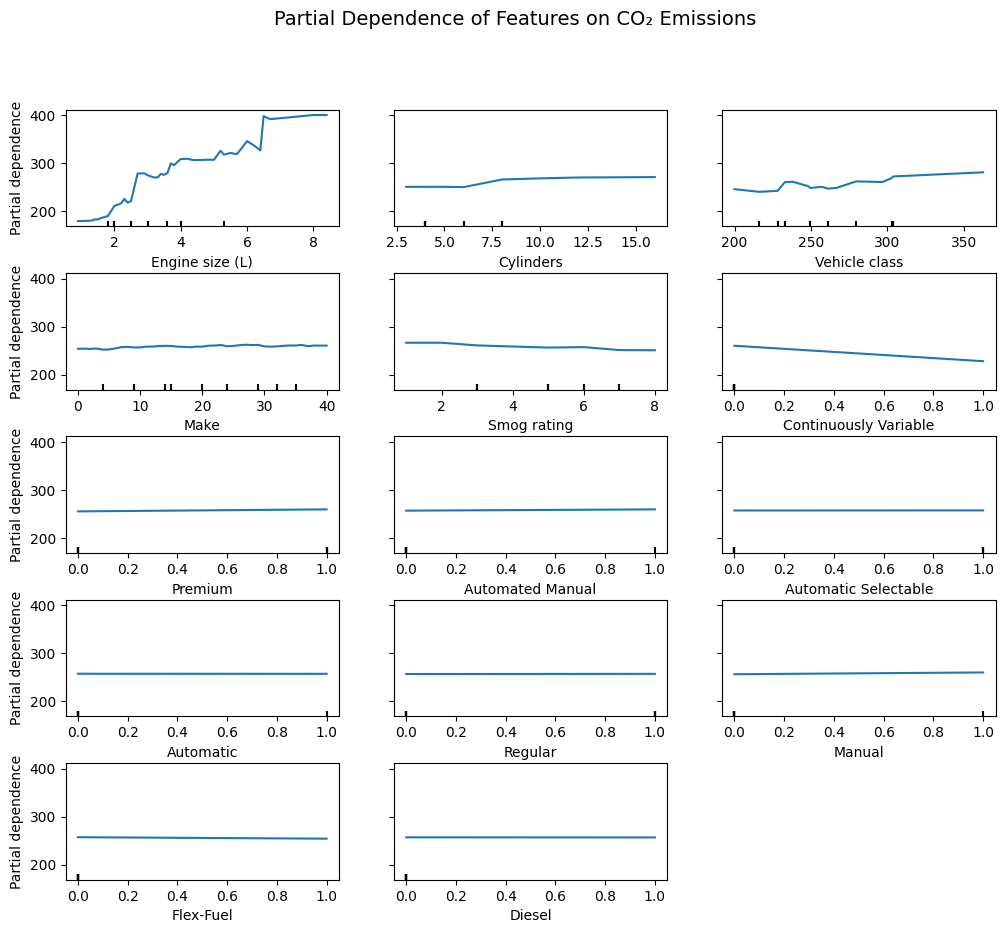

In [40]:
features_to_plot = ["Engine size (L)", "Cylinders", "Vehicle class", "Make", "Smog rating",
                    "Continuously Variable", "Premium", "Automated Manual", "Automatic Selectable",
                    "Automatic", "Regular", "Manual", "Flex-Fuel", "Diesel"]

fig, ax = plt.subplots(figsize=(12,10))
display = PartialDependenceDisplay.from_estimator(
    rf_model,
    X_train,
    features_to_plot,
    ax=ax
)

plt.suptitle("Partial Dependence of Features on CO₂ Emissions", fontsize=14)

# display.axes_ contains the actual subplot axes created by the display
axes = np.array(display.axes_).ravel()

axes = np.array(display.axes_).ravel()
for ax_i, feat in zip(axes, features_to_plot):
    ax_i.set_xlabel(feat)

fig.subplots_adjust(hspace=0.4)
plt.show()

PDP shows the predicted CO₂ emissions as we vary one feature while keeping others constant. A rising curve means increasing that feature increases emissions, while a downward trend indicates lower emissions.

### **Results**

Looking at the feature important visualization, immediately the engine size jumps out as the most obvious and impactful attribute. With a value of .728, we can say that knowing the engine size contributes about 72% to the prediction of the CO2 emissions. The partial dependence plot tell us there is a strong positive association between engine size and CO2 emissions pediction. Particularly, a significant increase occurs when jumping from 2 to 3 cylinders and when jumping from 6 to 8 cylinders. Engine size is 7 times more impactful than the second closest attribute, cylinders, which contributed 6.2% to the prediction of CO2 emissions. The partial dependence shows a weak positive association between cylinders and CO2 emissions prediction. The third most impactful attribute was vehicle class (ex: pickup truck standard, compact) contributing 5.88% to the CO2 emission prediction. The partial dependence plot demonstrates this as well, as some vehicle types are associated with higher CO2 predictions than others. Note the vehicle types are nominal unordered so the trend of the line isn't meaningful here. Other attributes of minor contributions are make (brand of the car) contributing 4.09%, smog rating (1 - 10 rating for how well the car does at reducing tailpipe emissions) contributing 3.88% to the prediction with a very weak positive association, and finally "Continuously Variable" which (a feature engineered binary attribute for whether the vehicle had continuously variable transmission or not) contributing 3.24% to the prediction and also has a weak negative association with CO2 emissions. All other attributes contributed less than 1% so they are negligable and have no association with CO2 emissions prediction, including fuel-type (more on fuel-type is part 7).

### **Insights and Conclusions**

Here we discuss 3 thing
1. The main finding from our analysis
2. How our results compare to existing narratives about car attributes
3. Recommendation for people who want a vehicle that emits low CO2



#### **Part 1: Engine size is the dominant property of a vehicle that determines how much CO2 it emits**

The results indicate that engine size is the critical driving factor for determining CO2 emissions. We know this because its information gain as a splitting attribute is over .7 and the partial dependency graph inicates an obvious strong positive association between it and CO2 emissions. Note that engine size is associated with the size of the vehicle. Larger vehicles require larger engine sizes because they require more power to drive. More power means more carbon burning which means more CO2 emissions.

Looking at the second and third most impactful attributes, they are also related to vehicle size: cylinders and vehicle class. Both of these attributes had a weak positive association with CO2 emissions and have a small influence (feature importance) on that actual CO2 emission prediction. The cylinders are the number of central power units in the engine. Having more cylinders means the engine is capable of generating more power. This means burning more fuel and as a result, emitting more CO2. Cars that are heavier need more power to move than lighter cars, so heavier (bigger) cars require more cylinders. Vehicle class describes the shape and size of the car so its clearly related to vehicle size as well.

#### **Part 2: Countering the narratives**

The results are suprising because they counter the current narratives about fuel type and transmission effect on CO2; and instead, attribute the fuel efficiency almost exclusively to the CO2 output of a car.

Narrative 1: Vehicles using diesel fuel have higher thermal efficiency which leads to lower CO2 emitted per kilometer traveled compared to gas-fueled vehicles.

Our evidence suggests there is no noticable decrease in CO2 emissions using diesel fuel compared to using regular fuel. Both feature importances are less than .01 and both dependency displays show no noticable association between themselves and CO2 emissions prediction.

Narrative 2: Because flex-fuel and can be burned differently due to its different chemical composition, significantly less CO2 is burned per gallon of fuel.

It's true that flexfuel uses biofuel so it is burned differently and technically does burn less CO2 per gallon of fuel. However, our results suggest the actual CO2 emissions of a vehicle using flex fuel are no better compared to a vehicle using regular fuel. Both flex-fuel and regular fuel have feature importances (influence on the prediction of CO2 emissions) less than .01 and both their dependency graphs show no association between themselves and CO2 emission prediction.


Narrative 3: Vehicles using continuously variable transmission emit significantly less CO2 than other transmission vehicles because it's constantly are adjusting the gear ratio get the most efficient RPM for the vehicle, so it takes away the normal "shift shock" most cars have which burns extra CO2.

That logic is correct but the significance of the impact continuously variable transmission has on CO2 emissions is much more extreme than than our results suggest. We uncovered a slight weak negative association between continuously variable transmission and CO2 emissions prediction and has a feature importance of .0324. From this, we can conclude vehicles using continuously variable transmission do not emit (in practice) significantly less CO2 than other vehicles.

#### **Part 3: Recommendations for who want a non-electric environmentally friendly car**

Don't fall into the sales traps from car dealerships about "environmentally-friendly" fuel and transmission. You're going to impact the environment more-or-less the same no matter which fuel or transmission you choose. What really matters is the size of the car. Choose the smallest and lightest car you can so it takes less power to move, therefore reuirining less fuel per kilometer traveled. The lighter your car is, the less harm you'll cause the the environment emiting CO2 on the road.